## Choose k
k is the number of blocks.  You select the block size and the function computes the number of blocks required for a given file size

## Convert split files (i.e. blocks) into byte arrays

## Testing decode

# Robust Soliton Distribution

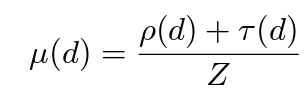
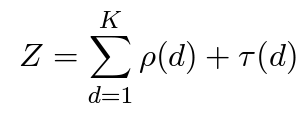
mu(d) = rho(d)+tau(d)/Z

Z = rho(d)+tau(d)/(sum(d, K))

In [3]:
# Files retrieved from 
# https://www.gutenberg.org/browse/scores/top
import os
import time
# import module
from datetime import datetime
import os.path

 
bs = 1        # 1 byte
#bs = 128     # 128 bytes
#bs = 512     # 512 bytes
#bs = 1024    # 1 KB
#k =  4096    # 4 KB
#k =  16384   # 16 KB

def get_file_size(test_file):
    file = open(test_file)
    # get the cursor positioned at end
    file.seek(0, os.SEEK_END)
    # get the current position of cursor 
    # this will be equivalent to size of file
    print("Size of file is :", file.tell(), "bytes")
    
def chunks(file_name, size=bs):
#    file_size = os.path.getsize('d:/file.jpg')
    i=0
    message_bytes=[]
    with open(file_name, encoding='latin') as f:
        # Read two files as byte arrays
            while content := f.read(size):
                    result_byte_array = bytearray(content, encoding='latin')
                    # Write the XORd bytes to the output file
#                    open(r'C:\Users\leberknightc\Fountain Code\m'+str(i)+'.txt', 'wb').write(result_byte_array)
                    message_bytes.append(result_byte_array)
#                    print(result_byte_array)
                    i+=1
#                    yield result_byte_array
#            print(message_bytes)
    return message_bytes


if __name__ == '__main__':
    blocks = []
#    test_file = r'C:\Users\leberknightc\Fountain Code\test_file3.txt' # 11 KB
#    test_file = r'C:\Users\leberknightc\Fountain Code\hello.txt' # 11 bytes 

    # get current date and time
    current_datetime = datetime.now().strftime("%Y-%m-%d %H-%M-%S")
    print("Current date & time : ", current_datetime)
 
    # convert datetime obj to string
    str_current_datetime = str(current_datetime)
 
    # create a file object along with extension
    file_name= "saved_message_"+str_current_datetime+".txt"
    file = open(file_name, 'w')
 
    print("File created : ", file.name)
    file.close()
    
        
    test_file = r'C:\Users\leberknightc\Fountain Code\%s' %file_name
    print(test_file)
    
    with open(file.name, "w") as f:
        f.write(input())

#    open(r'C:\Users\leberknightc\Fountain Code\ '+ str(file.name)).write(input())
    
    get_file_size(test_file)
    split_files = chunks(test_file)
    blocks = split_files
    print("Numnber of split_files: ", len(split_files))
    print("Number of blocks: ", len(blocks))
    print(split_files)
#    print(split_files[10])
    K=len(blocks)
#    print(blocks[10])
#    for i in range(len(split_files)):
#        print(i)

Current date & time :  2023-12-08 15-17-04
File created :  saved_message_2023-12-08 15-17-04.txt
C:\Users\leberknightc\Fountain Code\saved_message_2023-12-08 15-17-04.txt
Hello World
Size of file is : 11 bytes
Numnber of split_files:  11
Number of blocks:  11
[bytearray(b'H'), bytearray(b'e'), bytearray(b'l'), bytearray(b'l'), bytearray(b'o'), bytearray(b' '), bytearray(b'W'), bytearray(b'o'), bytearray(b'r'), bytearray(b'l'), bytearray(b'd')]


In [98]:
#test_file = r'C:\Users\leberknightc\Fountain Code\ '+ str(file.name)
#test_file = r'C:\Users\leberknightc\Fountain Code\saved_message_2023-11-13 22-16-58.txt'
#get_file_size(test_file)

file_name= "saved_message_"+str_current_datetime+".txt"
#file = open(file_name, 'w')
 
#print("File created : ", file.name)
#file.close()
          
#    test_file =r'C:\Users\leberknightc\Fountain Code\' + file_name
path = r'C:\Users\leberknightc\Fountain Code\%s' %file_name
print(path)
test_file = os.path.join(path, file_name)
print(test_file)

C:\Users\leberknightc\Fountain Code\saved_message_2023-11-13 23-39-06.txt
C:\Users\leberknightc\Fountain Code\saved_message_2023-11-13 23-39-06.txt\saved_message_2023-11-13 23-39-06.txt


## Compute probabilities for the robust soliton distribution
c, delta and K based on values in MacKay paper. Results for S, K/S and Z are the same, so we
know this code accurately generates the robust soliton distribution

In [4]:
# https://github.com/TeamErlich/dna-fountain/blob/master/robust_solition.pyx
# https://en.wikipedia.org/wiki/Soliton_distribution
# https://github.com/Spriteware/lt-codes-python/blob/master/distributions.py

import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def rho_d(K):
    rho = [1 / K]
    rho += [1 / (d * (d - 1)) for d in range(2, K+1)]
    return rho

def tau_d(K):   
    c = 0.2
    delta = 0.05
#    c = 0.1
#    delta = 0.5
    
    S = c*math.log(K/delta)*math.sqrt(K)
    print("S = ", S)
    print("K/S = ", K/S)
    tau = []

    for d in range(1, K+1):
        if d <= math.floor((K/S) - 1):
            t = (S/K)*(1/d)
        elif d == math.floor(K/S):
            t = (S/K)*math.log(S/delta)
        elif d > math.floor(K/S):
            t = 0
        tau.append(t)
    return tau

def compute_Z(rho, tau):
    Z = 0
    for i in range(len(rho)):
        Z += rho[i]+tau[i]
    return(Z)

def mu_d(rho, tau, Z): 
    mu = []
    mu += [(rho[d]+tau[d])/Z for d in range(len(rho))]
    return mu
    
if __name__ == '__main__':
    K = len(blocks)
#    print(rho_d(K))
#    print(tau_d(K))
    rho = rho_d(K)
    tau = tau_d(K)
    print("Z = ",compute_Z(rho, tau))
    Z = compute_Z(rho,tau)
    print("")
#    print("Robust Distribution: ", mu_d(rho, tau, Z))  
    mu = mu_d(rho,tau, Z)
#    print("Robust Soliton Probabilities", "\n", mu)
    print("Robust Soliton Probabilities")

    count = 1
    for p in mu:
        print(count, p)
        count += 1
#    print("Sum of Probabilities = ", sum(mu))
#    x = mu
#    plt.hist(x, density=True, bins=30)  # density=False would make counts
#    plt.ylabel('Frequency')
#    plt.xlabel('Data')

S =  3.5777277660352023
K/S =  3.074577139274651
Z =  2.8768305067130067

Robust Soliton Probabilities
1 0.14465818151902676
2 0.23033125789615383
3 0.5407427381119445
4 0.02896706397505075
5 0.01738023838503045
6 0.0115868255900203
7 0.008276303992871643
8 0.006207227994653732
9 0.004827843995841792
10 0.0038622751966734337
11 0.003160043342732809


## Create the G Matrix

Generate number of blocks to XOR together (d) for each block by sampling from the robust soliton

THE SERVER NEEDS THIS CODE TO RECONSTRUCT THE MATRIX SO THE DECODE XOR OPERATIONS ARE PERFORMED ON THE SAME PAIRS.  
ALL THAT NEEDS TO BE TRANSMITTED TO THE SERVER IS: 
1. file size, k (k is the random seed)



In [7]:
import random
from random import sample
import numpy as np

#K=len(blocks)
#random.seed(K)
num_messages = list(range(0,K))
distribution = mu

'''
def create_un_encoded_mesg_index(num_messages, distribution, prob):
    un_encoded_message_index = random.choices(num_messages,distribution, k=prob).pop()
    return un_encoded_message_index
 '''

def generate_matrix(G):

    # Ensure that one message is not encoded as per LT algorithm
    # If no single plain text message exists, make G(i,i) = 1
    # to contain the message without encoding

      
    empty_count = 0 
    random_message_pairs = random.choices(num_messages, distribution, k= len(blocks))  # determines number of messages to xor
    print("Random Message Pairs:", random_message_pairs)
    
    for i in range(len(G)):
        message_pairs = sample(num_messages, random_message_pairs[i])
        unique_pairs = set(message_pairs) # get unique values in list
        message_pairs = list(unique_pairs)
        if not message_pairs or len(message_pairs)==1:
            G[i][i] = 1
            continue
        for j in range(len(message_pairs)):
            G[i][message_pairs[j]] = 1
    return G
'''
    for i in range(len(G)):  # for each row in the matrix randomly pick n indices that will be used to encode message i
        message_pairs = sample(num_messages, random_message_pairs[i])
#        print("Message pair:", message_pairs)
        if len(message_pairs) > 1 and i in message_pairs:  # we dont want to xor a message i with itself, so if it's in the message pair remove it
#            message_pairs.remove(i)
            unique_pairs = set(message_pairs) # get unique values in list
            message_pairs = list(unique_pairs)
        if not message_pairs:  # Check if list is empty
            G[i][i] = 1        # Assign 1 to G(i,i) since no pair was randomly chosen
            empty_count += 1         # Count the times we generate a plaintext unencoded message
            continue
        for j in range(len(message_pairs)):
#            if len(message_pairs) == 1:
#                single_count += 1    # Count the times when the size of the message pairs only contains 1 message
            G[i][message_pairs[j]] = 1    

##    print(count)   
    if empty_count == 0:  # If we dont have a single plain text message (i.e. message not paired for XOR)
                    # randomly choose a message and send the plain unencoded message
        un_encoded_message_num = create_un_encoded_mesg_index(num_messages,distribution, 1)
        print("Number of plain unencoded messages:", empty_count)
        print("Unencoded message number:",un_encoded_message_num)
        G[un_encoded_message_num][un_encoded_message_num] = 1  
        
    return G
 ''' 
def main():
    random.seed(K)
    G= np.zeros((len(num_messages),len(num_messages)))
    G_mat = generate_matrix(G)
    print(G_mat)

main()
# [2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 0]

Random Message Pairs: [2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 0]
[[0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# Encoding Method 2

In [10]:
# https://www.megabeets.net/xor-files-python/
# https://stackoverflow.com/questions/50217453/how-to-apply-bitwise-like-xor-between-lists-of-different-lengths
# Using numpy.bitwise_xor
import numpy
import itertools
import random
from random import sample

num_messages = list(range(0,K))
distribution = mu
random.seed(K)
    
def generate_matrix(G):

    # Ensure that one message is not encoded as per LT algorithm
    # If no single plain text message exists, make G(i,i) = 1
    # to contain the message without encoding

      
    empty_count = 0 
    random_message_pairs = random.choices(num_messages, distribution, k= len(blocks))  # determines number of messages to xor
    print("Random Message Pairs:", random_message_pairs)
    
    for i in range(len(G)):
        message_pairs = sample(num_messages, random_message_pairs[i])
        unique_pairs = set(message_pairs) # get unique values in list
        message_pairs = list(unique_pairs)
        if not message_pairs or len(message_pairs) ==1:
            G[i][i] = 1
            continue
        for j in range(len(message_pairs)):
            G[i][message_pairs[j]] = 1
    return G

# The function get_mesg_pairs returns a dictionary of messages as keys and which other
# messages are XOR'd from the G matrix as values
def get_mesg_pairs(G):  
    mesg_pairs = {}       
    for i in range(len(G)):  # number of rows
        xor_row_list = []
        for j in range(len(G)):  # of columns
            if G[i][j] == 1:
                xor_row_list.append(j)
            mesg_pairs[i] = xor_row_list
    return mesg_pairs

    
def encode(m): # xor all elements in mesg_pairs list
#    print(bytes(split_files[10]))
    t = []  # create the list to store the encoded blocks for the message (i.e. test_file3.txt)
    first_block = split_files[1]
    last_block = split_files[K-1]
    count = 0
    for k, v in m.items():
#        xor_encode = split_files[k]  # first message for each row in the G matrix
#        print(k,len(v))
        if len(v)-1 == 0:
            plain_text_mesg = split_files[k]             # only 1 block in the list
            count += 1                                   # so do not do encode! Just
                                                         # store it as plain text
            t.append(plain_text_mesg)                    # message in list, t
            continue
           
        for j in range(len(v)-1):

        # XOR only works if files are the same size.  If XOR a two different sized files
        # we pad the smaller file with 0's to make them the same size
        # We can make it the same size as the first block (split_files[1])
        # since we know it will alway occupy the entire block
        # We just make sure to avoid the case where the only block in the random_pairs list
        # is the last block.  We send this as plain text and dont need to encode it
        # or any message which only has a single pair in the random_pairs list
        # This usually happens with the last block if it doesnt fill the entire block
        # and any XOR pair that includes the last block

            if len(split_files[v[j]]) < bs and len(v) > 1:  # make sure not XOR single block
                                                             # with itself
                                                          
                split_files[v[j]] = [l | r for (l, r) in itertools.zip_longest(split_files[v[j]], split_files[1], fillvalue=0)]
                xor_encode = split_files[v[j]]
                next_mesg = split_files[v[j+1]]
 
            else:                                               # If there is more than
                                                                # 1 pair in the list
                                                                # encode them!
                xor_encode = split_files[v[j]]
                next_mesg = split_files[v[j+1]]
#            print(xor_encode)
#            print(next_mesg)
            xor_encode = bytes(a ^ b for (a,b) in zip(xor_encode,next_mesg))
        t.append(xor_encode)  # contains the encoded blocks for each 1KB block from the 11 KB file test_file3.txt
    print("Number of plaintext messages:", count) 
    return t
    
if __name__ == '__main__':
    G= np.zeros((len(num_messages),len(num_messages)))
    G_mat = generate_matrix(G)
    m = get_mesg_pairs(G)
    print("Message Pairs")
    print(m)
    t = encode(m)
    print("Encoded Messages")
    print(t)
#    split_files = chunks(test_file)
    print("Messages")
    print(split_files)
#    print(t[9])
#    print(split_files[10])

Random Message Pairs: [2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 0]
Message Pairs
{0: [2, 4], 1: [1, 8], 2: [0, 6, 10], 3: [7, 9], 4: [2, 10], 5: [0, 9], 6: [6], 7: [0, 1], 8: [0, 3], 9: [3, 9], 10: [10]}
Number of plaintext messages: 2
Encoded Messages
[b'\x03', b'\x17', b'3', b'\x03', b'\x08', b'$', bytearray(b'W'), b'-', b'$', b'\x00', bytearray(b'd')]
Messages
[bytearray(b'H'), bytearray(b'e'), bytearray(b'l'), bytearray(b'l'), bytearray(b'o'), bytearray(b' '), bytearray(b'W'), bytearray(b'o'), bytearray(b'r'), bytearray(b'l'), bytearray(b'd')]


## Symbols to Message Graph

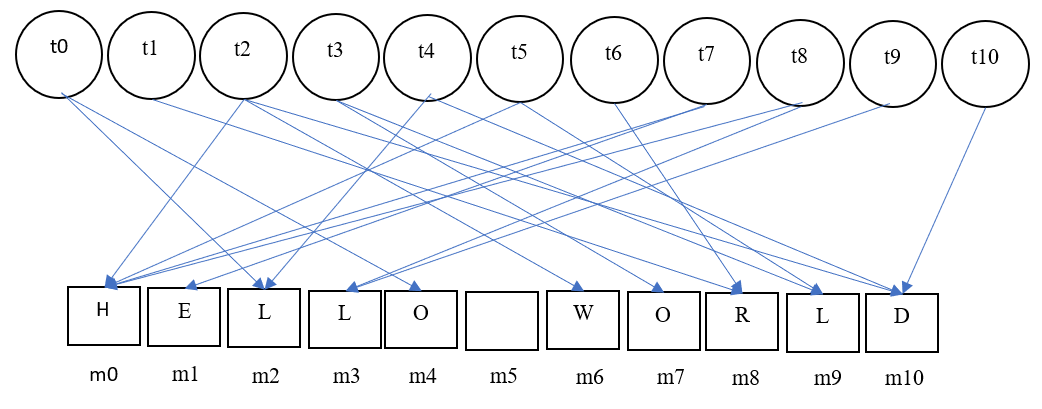

## Decode m2
Since we know t10 = m10 and t4 only depends on one other message, m2,  we can XOR t10 ^ t4 and get m2

In [72]:
xor_encode = split_files[2]
xor_decode  = t[4]

test_list1 = [split_files[10]]
test_list2 = [t[10]]

for block in test_list1:
    xor_encode = bytes(a ^ b for (a,b) in zip(xor_encode, block))
print("Encoded message: ", xor_encode)
print(xor_encode == t[4])
    
for block in test_list2:
    xor_decode = bytes(a ^ b for (a,b) in zip(xor_decode, block))
print(xor_decode)
print(xor_decode == split_files[2])
print(split_files[2])

Encoded message:  b'\x08'
True
b'l'
True
bytearray(b'l')


## Decode m4

Now we can decode t0 since depends on m4 which we already know from the previous cell and m2.

To decode m4:
m2 = t4 ^ t10 
t0 = m2 ^ m4  or m4 = t0 ^ m2 
substituting m2 we get
m4 = t0 ^ t4 ^ t10

So, we dont need to receive m4 to decode it

In [73]:
xor_encode = split_files[4]
xor_decode  = t[0]

test_list1 = [split_files[2]]
test_list2 = [t[4], t[10]]

for block in test_list1:
    xor_encode = bytes(a ^ b for (a,b) in zip(xor_encode, block))
print("Encoded message: ", xor_encode)
print(xor_encode == t[0])
    
for block in test_list2:
    xor_decode = bytes(a ^ b for (a,b) in zip(xor_decode, block))
print("Decoded message: ", xor_decode)
print(xor_decode == split_files[4])
#print(split_files[4])


Encoded message:  b'\x03'
True
Decoded message:  b'o'
True


## Decode m8
t1 and t6 only point to m8 so the m8 is plain text.  No decoding is necessary

## Decoding

### Algorithm
1. Randomly select and send an encoded block
2. Continue to send an encoded block until we receive an encoded block with only 1 symbol.  i.e.    [10]
2. If the encoded block contains one symbol, move it to the decoded list, since it is the message
3. If the encoded block contains more than one symbol 
   a. check if there is another block where the difference between message pairs is no more than               1 pair.  
                      For example, difference between [4,10] and [2,10] is one message pair                             [4,2]
                      Or difference between [4,10] and [10] is [4]  
                      
      If the condition exists, check if a decoded message exists on the decoded list that               contains the encoded message.  If true, xor the encoded symbol with the message on the           decoded list                 
                     For example, if t[4] = [10,2] is received and we have t[10] = [10] in the                        decoded list, xor t[10] with t[4] to get [2]. Now we have,t[10] and t[4]
                     on the decoded symbol list, and [10] and[2] on the message list.  
                     If we next receive t[0] = [4,2] we check the decoded list and compute the                        difference between each decdoded message and the encoded message pairs in                        the symbol t[0].  Since the difference between t[4] = [10,2] and t[0] =                          [4,2] = 1 we can decode the symbol xor t[0] with t[4] and t[10]                     
                     t[0] = m4^m2
                     t[4] =m2^ m10
                     t[10] = m10
                     Working back from t[10]:
                     t[4] = m2^m10 = m2^t[10] or m2 = t[4] ^ t[10]
                     t[0] = m4 ^ m2 = m4^t[4]^[t10] or t[0]^t[4]^t[10] = m4
                     
                     Now move m4 to the message list and t[0] to the decoded symbol list
     messages = [m10]
     decoded_symbols = t[10]
     encoded = [m10,m2], [m4,m2]
     
     messages = m10, m2
     decoded_symbols = t[10], t[4]
     encoded = [m4,m2]

In [22]:
import random
from random import sample

t_list = [[4,2], [8], [10,0,6], [7,9], [10,2], [9,0], [8], [1,0], [0,3], [3], [10]]
t_dict = {0: [4,2], 1: [8], 2: [10,0,6], 3: [7,9], 4: [10,2], 5: [9,0], 6: [8], 7: [1,0], 8: [0,3], 9: [3], 10: [10]}
decoded_messages = dict()
decode_pending =   dict()

'''
[b'\x03', bytearray(b'e'), b'\x13', b'\x03', b'\x08', b'\x04', bytearray(b'w'), 
b'\r', b'\x04', bytearray(b'l'), bytearray(b'd')]
0  [4, 2]      'H'
1 [8]          'E'
2 [10, 0, 6]   'L'
3 [7, 9]       'L'
4 [10, 2]      'O'
5 [9, 0]       ' '
6 [8]          'W'
7 [1, 0]       'O'
8 [0, 3]       'R'
9 [3]          'L'
10 [10]        'D'
'''

def decode_test(decoded_messages, decode_pending):
    
    for k1,v1 in decoded_messages.items():
        for k2,v2 in decode_pending.items():
            if set(v1).issubset(set(v2)) and len(v2) == len(v1)+1:
                print("Subset Found!")
                print(k1, k2)
                message = decode_symbols(k1,k2)
                print("m" +str(k2)+" =", message)
                update_dicts(decoded_messages, decode_pending, k1, v1, k2, v2)
                return True
#                break
#                print("True")
            else:
                print("No Subset!")
                continue
            
def send_symbols(keys):
    k = 3  # the number of encoded messages to send
    num_symbols = random.sample(keys,k)
    print("Random symbols sent: ", k)
#    values = [one_mesg_symbols(i, t_dict[i]) if len(t_dict[i]) == 1 else symbol_hold(i, t_dict[i]) for i in k]
    for i in num_symbols:
        if len(t_dict[i]) == 1:
            one_mesg_symbols(i, t_dict[i])
        else:
            symbol_hold(i, t_dict[i])
    print("Decoded Messages")
    print(decoded_messages)
    print("Decode Pending")
    print(decode_pending)


def decode_symbols(k1, k2):
    print(k1)
    print(k2)
#    print(t[k1])
#    print(t[k2])
    result = bytes(a ^ b for (a,b) in zip(t[k1], t[k2]))
    return result

def update_dicts(decoded_messages, decode_pending, k1, v1, k2, v2):
    decoded_messages[k2] = v2
    decode_pending.pop(k2)
    print(decoded_messages)
    print(decode_pending)
    decode_test(decoded_messages, decode_pending)
    

def one_mesg_symbols(key, value):
    decoded_messages[key] = value
    return decoded_messages 
    
def symbol_hold(key, value):
    decode_pending[key] = value
    return decode_pending
    
def main():    

    keys = list(t_dict.keys())
    symbols_sent = send_symbols(keys)
    
    if not bool(decoded_messages): # if there are no decoded messages, send more symbols
        print("Send more symbols!")
        symbols_sent = send_symbols(keys)
    elif not bool(decode_pending): # if there are no symbols to decode, send more symbols
        print("No symbols to decode.  Send more symbols!")
        symbols_sent = send_symbols(keys)
    else: 
        print("Check XOR")
        xor_test = decode_test(decoded_messages, decode_pending)
        print(xor_test)
        m_count = 0
        s_count = 0
        
        while s_count < 11:
            if xor_test:
                message = decode_symbols(decoded_messages, decode_pending)
                m_count += 1
            else:
                symbols_sent = send_symbols(keys)
                xor_test = decode_test(decoded_messages, decode_pending)
                s_count += 1       
        
#    print("Decoded symbol: ", message)
    print("# times xor test performed: ", m_count)
    print("# times symbols sent: ", s_count)
    print("Decoded messages: ", decoded_messages)
    print("Decode pending: ", decode_pending)
    
main()


Random symbols sent:  3
Decoded Messages
{}
Decode Pending
{0: [4, 2], 7: [1, 0], 5: [9, 0]}
Send more symbols!
Random symbols sent:  3
Decoded Messages
{9: [3]}
Decode Pending
{0: [4, 2], 7: [1, 0], 5: [9, 0], 3: [7, 9]}


UnboundLocalError: cannot access local variable 'm_count' where it is not associated with a value

In [31]:
print(t_list[10])

[10]


In [6]:
import random
from random import sample

decoded_symbols = dict()
encoded_messages = dict()
dups = dict()
# code for counting fuplicate messages
# https://stackoverflow.com/questions/23240969/python-count-repeated-elements-in-the-list

t_list = [[4,2], [8], [10,0,6], [7,9], [10,2], [9,0], [8], [1,0], [0,3], [3], [10]]
t_dict = {0: [4,2], 1: [8], 2: [10,0,6], 3: [7,9], 4: [10,2], 5: [9,0], 6: [8], 7: [1,0], 8: [0,3], 9: [3], 10: [10]}
xor_pairs = {0: [4,2], 1: [8], 2: [10,0,6], 3: [7,9], 4: [10,2], 5: [9,0], 6: [8], 7: [1,0], 8: [0,3], 9: [3], 10: [10]}
messages = {}
num_messages = []

def send_messages(nm, keys):
    for j in range(nm):  # send 11 messages since there are 11 blocks
        n_mesg = 1  # the number of encoded messages to send
        num_symbols = random.sample(keys,n_mesg)
        for i in num_symbols:
            num_messages.append(i)
            add_message_to_list(t_list, i) # t_list is the encoded symbols we send
    return num_messages # contains the list of all symbols sent
 
def add_message_to_list(t_list,i):
    if len(t_list[i]) == 1:
        decoded_symbols[i] = t_list[i]
        messages[i] = t[i].decode("utf-8")
        print("message: t[",i,"] =",messages[i])
#        print("message: t[",i,"] =",t_dict[i])
    else:
        encoded_messages[i] = t_list[i]
        print("encoded message: t[",i,"] =",t_list[i])
#    can_decode(decoded_symbols, encoded_messages)  # Make sure the encoded message and 
                                                    # decoded message list are not empty

def print_decoded_symbol_list(symbol):
    # Sort decoded symbols by keys
    myKeys = list(symbol.keys())
    myKeys.sort()
    sorted_decoded_symbols = {i: symbol[i] for i in myKeys}
    print("Sorted Decoded Symbols by Keys: ", sorted_decoded_symbols)

def print_decoded_message_list(messages):  
    # Sort decoded messages by keys
    myKeys = list(messages.keys())
    myKeys.sort()
    sorted_messages = {i: messages[i] for i in myKeys}
    print("Sorted Decoded Messages by Keys: ", sorted_messages)

def print_encoded_message_list(encoded_mesg):
    # Sort encoded messages by keys
    myKeys = list(encoded_mesg.keys())
    myKeys.sort()
    sorted_encoded_messages = {i: encoded_mesg[i] for i in myKeys}
    print("Sorted Encoded Messages by Keys: ", sorted_encoded_messages)

def can_decode(ds, em):
#    Empty dictionaries evaluate to False in Python:

#    >>> dct = {}
#    >>> bool(dct)
#    False
#    >>> not dct
#    True

    res = not bool(ds) or not bool(em) # if both are empty return "True"
#    print_decoded_message_list(dm)
#    print_encoded_message_list(em)
    return res
    
def subset_test(ds, em):
    for k1_ds,v1_ds in ds.items():
        for k2_em,v2_em in em.items():
            print(k1_ds,k2_em)
            if set(v1_ds).issubset(set(v2_em)) and len(v2_em) == len(v1_ds)+1:
                print("Subset Found!")
                print(k1_ds, k2_em)
                message = decode_message(k1_ds,k2_em)
                message_id = (set(v2_em) - set(v1_ds)).pop()
                print(message_id)
                print("mesg_id is: ", message_id)
#                print("m" + str(message_id) + " =", message)
                update_message_dict(message, message_id)
                update_decoded_symbol_dict(ds,message_id)
                
                symbol = compute_new_symbol(k1_ds, message_id)

                print("New symbol from XOR of 2 messages: t","[",k2_em,"] =", symbol)
#                print("Decoding 2 messages, t","[",k2_em,"]", x)
                return True
#                break
#                print("True")
            else:
                print("No Subset!")
                continue
                
def update_message_dict(message, message_id):
    messages[message_id] = message
    print_decoded_message_list(messages)

def update_decoded_symbol_dict(ds,message_id):
    ds[message_id] = t_dict[message_id]
    print_decoded_symbol_list(ds)
    
def decode_message(k1,k2):
    xor_pair = bytes(a ^ b for (a,b) in zip(t[k1], t[k2]))
    return xor_pair.decode("utf-8")

def compute_new_symbol(m1, m2):
#    m1 = bytes(messages[m1], encoding='latin')
#    m2 = bytes(messages[m2], encoding='latin')
    m1 = bytes(messages[m1], encoding="utf-8")
    m2 = bytes(messages[m2], encoding="utf-8")
    print(m1)
    print(m2)
#    xor_mesgs = bytearray(a^b for (a,b) in zip(m1,m2))
    new_symbol = bytes(a^b for (a,b) in zip(m1,m2))
    return new_symbol
    
def count_dups(num_mesg_sent):
    messages_sent = {i:num_mesg_sent.count(i) for i in num_mesg_sent}
    #print(num_messages)
    #print("Messages Sent: ", messages_sent)
    print("Total Messages Sent: ", sum(messages_sent.values()))

    dups = dict((k, v) for k, v in messages_sent.items() if v > 1)
    print("Duplicate Messages: ",  dups)
    
def total_unique_messages(num_mesg_sent):
    # importing Counter module
    from collections import Counter
    unique_messages_received = Counter(num_mesg_sent).keys()
    print("Number of unique messages:", len(unique_messages_received))

def setup():
    keys = list(t_dict.keys())
    nm = int(input("Enter the number of messages to send: " ))
    num_mesg_sent = send_messages(nm, keys)
    count_dups(num_mesg_sent)
    total_unique_messages(num_mesg_sent)
    print_decoded_symbol_list(decoded_symbols)
    print_decoded_message_list(messages)
    print_encoded_message_list(encoded_messages)
    result = can_decode(decoded_symbols,encoded_messages)
    return result

def main():
    re = setup() # re is True if both decoded_messages and encoded_messages are empty

    while re:  # if decoded_message and encoded_messages are empty send another message
        print(re, "Send another message")
        re = setup()        
    print(re, "Try to decode")   
    is_subset = subset_test(decoded_symbols,encoded_messages)
    print(is_subset)
    while not is_subset:
        re = setup()
        is_subset = subset_test(decoded_symbols,encoded_messages)

main()

Enter the number of messages to send: 5
encoded message: t[ 0 ] = [4, 2]
encoded message: t[ 7 ] = [1, 0]
encoded message: t[ 5 ] = [9, 0]
encoded message: t[ 7 ] = [1, 0]
message: t[ 9 ] = l
Total Messages Sent:  5
Duplicate Messages:  {7: 2}
Number of unique messages: 4
Sorted Decoded Symbols by Keys:  {9: [3]}
Sorted Decoded Messages by Keys:  {9: 'l'}
Sorted Encoded Messages by Keys:  {0: [4, 2], 5: [9, 0], 7: [1, 0]}
False Try to decode
9 0
No Subset!
9 7
No Subset!
9 5
No Subset!
None
Enter the number of messages to send: 2
encoded message: t[ 3 ] = [7, 9]
encoded message: t[ 8 ] = [0, 3]
Total Messages Sent:  7
Duplicate Messages:  {7: 2}
Number of unique messages: 6
Sorted Decoded Symbols by Keys:  {9: [3]}
Sorted Decoded Messages by Keys:  {9: 'l'}
Sorted Encoded Messages by Keys:  {0: [4, 2], 3: [7, 9], 5: [9, 0], 7: [1, 0], 8: [0, 3]}
9 0
No Subset!
9 7
No Subset!
9 5
No Subset!
9 3
No Subset!
9 8
Subset Found!
9 8
0
mesg_id is:  0
Sorted Decoded Messages by Keys:  {0: 'h', 

In [15]:
'''
a = {1,2,3,4,5}
b= {1,2,3,4}
result = (set(a)-set(b)).pop()
print(result)
'''

a = b'l'
b = b'h'
#s = b'\x04'
s = bytes(a ^ b for (a,b) in zip(a, b))
print(s)
print(type(s))
output = s.decode("utf-8")
#print(output)
output = chr(ord(s))
print(output)
#convert bytes to string using decode()
'''
str = b'blogs linuxhint'
print(str)
print(type(str))

# now converting bytes to string
output = str.decode()

print('\nOutput:')
print(output)
print(type(output))
'''

b'\x04'
<class 'bytes'>



"\nstr = b'blogs linuxhint'\nprint(str)\nprint(type(str))\n\n# now converting bytes to string\noutput = str.decode()\n\nprint('\nOutput:')\nprint(output)\nprint(type(output))\n"

In [11]:
import random
from random import sample

t_list = [[4,2], [8], [10,0,6], [7,9], [10,2], [9,0], [8], [1,0], [0,3], [3], [10]]
t_dict = {0: [4,2], 1: [8], 2: [10,0,6], 3: [7,9], 4: [10,2], 5: [9,0], 6: [8], 7: [1,0], 8: [0,3], 9: [3], 10: [10]}
decoded_messages = dict()
decode_pending =   dict()

'''
[b'\x03', bytearray(b'e'), b'\x13', b'\x03', b'\x08', b'\x04', bytearray(b'w'), 
b'\r', b'\x04', bytearray(b'l'), bytearray(b'd')]
0  [4, 2]      'H'
1 [8]          'E'
2 [10, 0, 6]   'L'
3 [7, 9]       'L'
4 [10, 2]      'O'
5 [9, 0]       ' '
6 [8]          'W'
7 [1, 0]       'O'
8 [0, 3]       'R'
9 [3]          'L'
10 [10]        'D'
'''

def decode_test(decoded_messages, decode_pending):
    
    for k1,v1 in decoded_messages.items():
        for k2,v2 in decode_pending.items():
            if set(v1).issubset(set(v2)) and len(v2) == len(v1)+1:
                print("Subset Found!")
                print(k1, k2)
                message = decode_symbols(k1,k2)
                print("m" +str(k2)+" =", message)
                update_dicts(decoded_messages, decode_pending, k1, v1, k2, v2)
                return True
#                break
#                print("True")
            else:
                print("No Subset!")
                continue
            
def send_symbols(keys):
    k = random.sample(keys,3)
    print("Random symbols sent: ", k)
#    values = [one_mesg_symbols(i, t_dict[i]) if len(t_dict[i]) == 1 else symbol_hold(i, t_dict[i]) for i in k]
    for i in k:
        if len(t_dict[i]) == 1:
            one_mesg_symbols(i, t_dict[i])
        else:
            symbol_hold(i, t_dict[i])
    print("Decoded Messages")
    print(decoded_messages)
    print("Decode Pending")
    print(decode_pending)


def decode_symbols(k1, k2):
    print(k1)
    print(k2)
#    print(t[k1])
#    print(t[k2])
    result = bytes(a ^ b for (a,b) in zip(t[k1], t[k2]))
    return result

def update_dicts(decoded_messages, decode_pending, k1, v1, k2, v2):
    decoded_messages[k2] = v2
    decode_pending.pop(k2)
    print(decoded_messages)
    print(decode_pending)
    decode_test(decoded_messages, decode_pending)
    

def one_mesg_symbols(key, value):
    decoded_messages[key] = value
    return decoded_messages 
    
def symbol_hold(key, value):
    decode_pending[key] = value
    return decode_pending
    
def main():    

    keys = list(t_dict.keys())
    symbols_sent = send_symbols(keys)
    
    if not bool(decoded_messages): # if there are no decoded messages, send more symbols
        print("Send more symbols!")
        symbols_sent = send_symbols(keys)
    elif not bool(decode_pending): # if there are no symbols to decode, send more symbols
        print("No symbols to decode.  Send more symbols!")
        symbols_sent = send_symbols(keys)
    else: 
        print("Check XOR")
        xor_test = decode_test(decoded_messages, decode_pending)
        print(xor_test)
        m_count = 0
        s_count = 0
        
        while s_count < 11:
            if xor_test:
                message = decode_symbols(decoded_messages, decode_pending)
                m_count += 1
            else:
                symbols_sent = send_symbols(keys)
                xor_test = decode_test(decoded_messages, decode_pending)
                s_count += 1       
        
#    print("Decoded symbol: ", message)
    print("# times xor test performed: ", m_count)
    print("# times symbols sent: ", s_count)
    print("Decoded messages: ", decoded_messages)
    print("Decode pending: ", decode_pending)
    
main()


Random symbols sent:  [4, 6, 8]
Decoded Messages
{6: [8]}
Decode Pending
{4: [10, 2], 8: [0, 3]}
Check XOR
No Subset!
No Subset!
None
Random symbols sent:  [1, 4, 5]
Decoded Messages
{6: [8], 1: [8]}
Decode Pending
{4: [10, 2], 8: [0, 3], 5: [9, 0]}
No Subset!
No Subset!
No Subset!
No Subset!
No Subset!
No Subset!
Random symbols sent:  [3, 8, 4]
Decoded Messages
{6: [8], 1: [8]}
Decode Pending
{4: [10, 2], 8: [0, 3], 5: [9, 0], 3: [7, 9]}
No Subset!
No Subset!
No Subset!
No Subset!
No Subset!
No Subset!
No Subset!
No Subset!
Random symbols sent:  [0, 1, 9]
Decoded Messages
{6: [8], 1: [8], 9: [3]}
Decode Pending
{4: [10, 2], 8: [0, 3], 5: [9, 0], 3: [7, 9], 0: [4, 2]}
No Subset!
No Subset!
No Subset!
No Subset!
No Subset!
No Subset!
No Subset!
No Subset!
No Subset!
No Subset!
No Subset!
Subset Found!
9 8
9
8
m8 = b'h'
{6: [8], 1: [8], 9: [3], 8: [0, 3]}
{4: [10, 2], 5: [9, 0], 3: [7, 9], 0: [4, 2]}
No Subset!
No Subset!
No Subset!
No Subset!
No Subset!
No Subset!
No Subset!
No Subset!


TypeError: list indices must be integers or slices, not dict

In [50]:
#result = bytes(a ^ b for (a,b) in zip(t[k1], t[k2]))
#result = bytes(a ^ b for (a,b) in zip(t[8],t[9]))
result = bytes(a ^ b for (a,b) in zip(t[0],t[4]))
print(result)


b'\x0b'


In [3]:
v1 =[10]
v2 = [10,2]
print(v1.pop())

10


## Keep sending symbols until a subset is found

In [47]:
x = {9: [3], 6: [10,3]}
y = {2: [10, 0, 6], 8: [0, 3]}

for k1,v1 in x.items():
    for k2,v2 in y.items():
        if set(v1).issubset(set(v2)) and len(v2) == len(v1)+1:
            print("Subset Found!")
            print(v1, v2)
            print("True")
        else:
            print("False")
            

print(set([10,3]) ^ set([0,3]))

False
Subset Found!
[3] [0, 3]
True
False
False
{0, 10}


# Testing some code

In [108]:
import random
d = {'VENEZUELA':'CARACAS', 'CANADA':'OTTAWA'}
country, capital = random.choice(list(d.items()))
print(country, capital)

CANADA OTTAWA


In [ ]:
    for i in range(len(G)):
        message_pairs = sample(num_messages, random_message_pairs[i])
        if len(message_pairs) > 1:  
#            # ex. i = 1 and message pairs =(1,1,2).  Should only return (1,2)
             # ex. i = 1 and message pairs =(1,2).    Should return (1,2), not (2) eventhough i = 1
             # ex. i = 1 and message pairs =(1,1).    Should only return (1) since i = 1 and we do not want XOR 1 with itself
            unique_pairs = set(message_pairs) # get unique values in list
            message_pairs = list(unique_pairs)
        if not message_pairs:  # Check if list is empty
            G[i][i] = 1        # Assign 1 to G(i,i) since no pair was randomly chosen
            mesg_pair_size += 1         # This is our single plaintext unencoded message
            continue
        for j in range(len(message_pairs)):
            if len(message_pairs) == 1:      # if only 1 element in message_pairs
                mesg_pair_size += 1  # count the number of times a message pair only contains 1 message
            G[i][message_pairs[j]] = 1


In [67]:
import random
#print(random.choice([i for i in range(0,9) if i not in [2,5,7]]))

K= 10
random.seed(K)
G= np.zeros((len(num_messages),len(num_messages)))
num_message = list(range(0,K))
count = 0

random_message_pairs = [2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 0]
for i in range(len(G)):
    message_pairs = sample(num_messages, random_message_pairs[i])
    unique_pairs = set(message_pairs) # get unique values in list
    message_pairs = list(unique_pairs)
    print(sum(message_pairs))
#    if sum(message_pairs) == 0 or sum(message_pairs == 1):
#        count += 1
#        print("unencoded messages: ", count)
    print(i, message_pairs)
    if not message_pairs:
        G[i][i] = 1
        continue
    for j in range(len(message_pairs)):
        G[i][message_pairs[j]] = 1

print(G)

9
0 [0, 9]
13
1 [6, 7]
12
2 [0, 9, 3]
17
3 [10, 7]
6
4 [2, 4]
8
5 [0, 8]
7
6 [7]
6
7 [1, 5]
8
8 [3, 5]
6
9 [0, 6]
0
10 []
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [73]:
random_message_pairs = [2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 0]
message_pairs = [0]
print(message_pairs= [0])
for i in range(len(message_pairs)):
    print("Hello")

TypeError: 'message_pairs' is an invalid keyword argument for print()

In [79]:
for i in range(10):
    if i%2 ==0:
        continue
    else:
        print(i)
    for j in range(10):
        k = i+10
        print(k)

1
11
11
11
11
11
11
11
11
11
11
3
13
13
13
13
13
13
13
13
13
13
5
15
15
15
15
15
15
15
15
15
15
7
17
17
17
17
17
17
17
17
17
17
9
19
19
19
19
19
19
19
19
19
19
